# Look into the MNIST dataset with PyTorch.
stough 202-

The [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) is one of the first large machine learning datasets, originally designed for the computer vision task of recognizing digits on bank checks. 
It consists of some {60000 training, 10000 test} 28x28 grayscale images of handwritten digits, along with each image's associated decimal digit represented. 

[PyTorch](https://pytorch.org/) is open source machine learning library principally developed by Facebook. It enables us to perform very advanced GPU-based machine learning through a convenient Python interface. 

We will here explore the MNIST dataset through PyTorch.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

import torch
from torch.utils.data import (Dataset,
                              DataLoader)
import torchvision.datasets as datasets
import torchvision.transforms
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

## Download the training and test Datasets
Torch allows us to interface with our data through [DataLoader and Dataset](https://pytorch.org/docs/stable/data.html#) objects.

In [2]:
# Thank you: https://www.aiworkbox.com/lessons/load-mnist-dataset-from-pytorch-torchvision
# https://pytorch.org/docs/stable/torchvision/datasets.html
mnist_trainset = datasets.MNIST(root='/home/dip365/data', train=True, download=False, transform=None, target_transform=None)
mnist_testset = datasets.MNIST(root='/home/dip365/data', train=False, download=False, transform=None, target_transform=None)

In [3]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/dip365/data
    Split: Train

In [4]:
mnist_trainset[10000]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F92657E1588>, 3)

In [5]:
mnist_trainset[10000][0]

In [6]:
to_tensor = ToTensor()

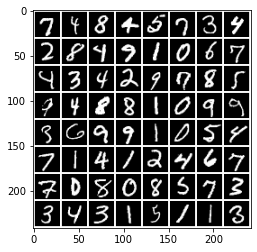

In [7]:
samples = torch.stack([to_tensor(mnist_trainset[r][0]) 
                       for r in np.random.choice(len(mnist_trainset), 64, replace=False)])

plt.imshow(make_grid(samples, nrow=8, pad_value=1.0).permute(1,2,0))

### Let's look at all training sevens.
We do the permute because torch is channels-first, meaning each image is actually (1,28,28). 
If our images were color, the default orientation would be (3,h,w). This orientation is 
incompatible with matplotlib's `imshow`.

In [29]:
samples = torch.stack([to_tensor(mnist_trainset[r][0]) 
                       for r in range(len(mnist_trainset))
                       if mnist_trainset[r][1]==7])
# Filter out the image and leave only the ones with index 7

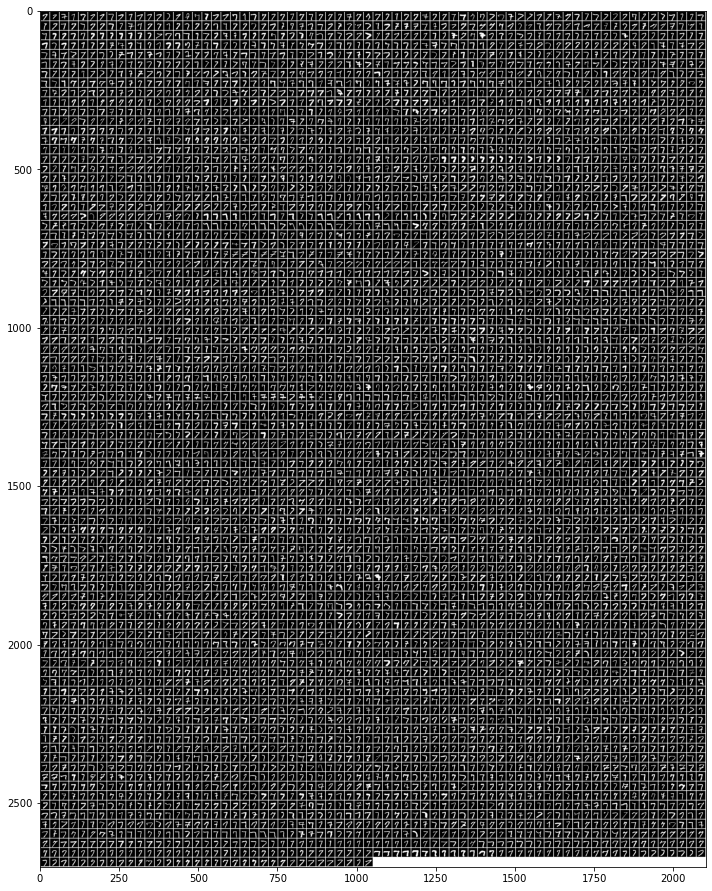

In [30]:
plt.figure(figsize=(10,30))
plt.imshow(make_grid(samples, nrow=70, pad_value=1.0).permute(1,2,0))
plt.tight_layout()

In [10]:
samples = samples.numpy().squeeze()

In [11]:
samples.shape

(6265, 28, 28)

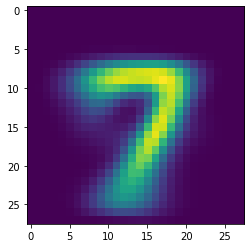

In [12]:
plt.imshow(np.sum(samples, axis=0))

In [13]:
mnist_testset[1000][0]